**Import required libraries**

In [1]:
import intake
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import datetime
import numpy as np

**Open the NWM intake catalog**

In [2]:
catalog = intake.open_catalog('s3://nextgen-dmac-cloud-ingest/nwm_ll/nwm_intake.yml',storage_options={'anon':True})
(list(catalog))

['NWM_Best_CONUS_Short_Range',
 'NWM_Best_CONUS_Medium_Range',
 'NWM_Best_Alaska_Short_Range',
 'NWM_Best_Alaska_Medium_Range',
 'NWM_Best_Hawaii_Short_Range',
 'NWM_Best_PuertoRico_Short_Range']

In [3]:
## open short range dataset:
import xarray as xr

ds_sr_nc = xr.open_dataset("files/nwm.t23z.short_range.channel_rt.f001.conus.nc")
ds_sr_nc

<xarray.Dataset> Size: 155MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 2776734)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-02-14
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-13T23:00:00
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 22MB ...
    nudge           (feature_id) float64 22MB ...
    velocity        (feature_id) float64 22MB ...
    qSfcLatRunoff   (feature_id) float64 22MB ...
    qBucket         (feature_id) float64 22MB ...
    qBtmVertRunoff  (feature_id) float64 22MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-02-13_23:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-02-14_00:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [4]:
cat = catalog['NWM_Best_CONUS_Short_Range']
ds_sr = cat.to_dask()
ds_sr

<xarray.Dataset> Size: 92GB
Dimensions:         (feature_id: 2776734, time: 689, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
    latitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    longitude       (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-25T15:00:00
  * time            (time) datetime64[ns] 6kB 2024-03-25T16:00:00 ... 2024-04...
Data variables:
    altitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    crs             (time) object 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    link_id         (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    nudge           (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBucket         (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    streamflow      (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    terminal_node   (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    to_link_id      (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    velocity        (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-03-25_16:00:00
    model_total_valid_times:    18
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [5]:
# medium range conus:
ds_mr_nc = xr.open_dataset("files/nwm.t18z.medium_range_blend.channel_rt.f001.conus.nc")
ds_mr_nc

<xarray.Dataset> Size: 155MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 2776734)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-02-13T19:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-13T18:00:00
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 22MB ...
    nudge           (feature_id) float64 22MB ...
    velocity        (feature_id) float64 22MB ...
    qSfcLatRunoff   (feature_id) float64 22MB ...
    qBucket         (feature_id) float64 22MB ...
    qBtmVertRunoff  (feature_id) float64 22MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-02-13_18:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-02-13_19:00:00
    ...                         ...
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...
    model_configuration:        medium_range_blend

**Select the catalog entry to open**

In [6]:
cat = catalog['NWM_Best_CONUS_Medium_Range']
ds_mr = cat.to_dask()
ds_mr

<xarray.Dataset> Size: 121GB
Dimensions:         (feature_id: 2776734, time: 906, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
    latitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    longitude       (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-25T12:00:00
  * time            (time) datetime64[ns] 7kB 2024-03-25T13:00:00 ... 2024-05...
Data variables:
    altitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    crs             (time) object 7kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    link_id         (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    nudge           (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBucket         (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    streamflow      (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    terminal_node   (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    to_link_id      (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    velocity        (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-03-25_13:00:00
    model_total_valid_times:    240
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [7]:
# short range alaska:
ds_ak_sr_nc = xr.open_dataset("files/nwm.t00z.short_range.channel_rt.f001.alaska.nc")
ds_ak_sr_nc

<xarray.Dataset> Size: 22MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 391528)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T01:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03
  * feature_id      (feature_id) int64 3MB 11 12 ... 75005400047364
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 3MB ...
    nudge           (feature_id) float64 3MB ...
    velocity        (feature_id) float64 3MB ...
    qSfcLatRunoff   (feature_id) float64 3MB ...
    qBucket         (feature_id) float64 3MB ...
    qBtmVertRunoff  (feature_id) float64 3MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    model_initialization_time:  2024-03-03_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_01:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [8]:
cat = catalog['NWM_Best_Alaska_Short_Range']
ds_ak_sr = cat.to_dask()
ds_ak_sr

<xarray.Dataset> Size: 13GB
Dimensions:         (feature_id: 391528, time: 717, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 3MB 11 12 ... 75005400047364
    latitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    longitude       (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-25T15:00:00
  * time            (time) datetime64[ns] 6kB 2024-03-25T16:00:00 ... 2024-04...
Data variables:
    altitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    crs             (time) object 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    link_id         (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    nudge           (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBucket         (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    streamflow      (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    terminal_node   (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    to_link_id      (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    velocity        (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-03-25_16:00:00
    model_total_valid_times:    45
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [9]:
# short range alaska:
ds_ak_mr_nc = xr.open_dataset("files/nwm.t00z.medium_range_blend.channel_rt.f001.alaska.nc")
ds_ak_mr_nc

<xarray.Dataset> Size: 22MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 391528)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T01:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03
  * feature_id      (feature_id) int64 3MB 11 12 ... 75005400047364
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 3MB ...
    nudge           (feature_id) float64 3MB ...
    velocity        (feature_id) float64 3MB ...
    qSfcLatRunoff   (feature_id) float64 3MB ...
    qBucket         (feature_id) float64 3MB ...
    qBtmVertRunoff  (feature_id) float64 3MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    model_initialization_time:  2024-03-03_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_01:00:00
    ...                         ...
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...
    model_configuration:        medium_range_blend_alaska

In [10]:
cat = catalog['NWM_Best_Alaska_Medium_Range']
ds_ak_mr = cat.to_dask()
ds_ak_mr

<xarray.Dataset> Size: 17GB
Dimensions:         (feature_id: 391528, time: 907, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 3MB 11 12 ... 75005400047364
    latitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    longitude       (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-25T06:00:00
  * time            (time) datetime64[ns] 7kB 2024-03-25T12:00:00 ... 2024-05...
Data variables:
    altitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    crs             (time) object 7kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    link_id         (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    nudge           (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBucket         (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    streamflow      (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    terminal_node   (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    to_link_id      (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    velocity        (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-03-25_12:00:00
    model_total_valid_times:    240
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [11]:
# short range alaska:
ds_hi_sr_nc = xr.open_dataset("files/nwm.t00z.short_range.channel_rt.f00015.hawaii.nc")
ds_hi_sr_nc

<xarray.Dataset> Size: 764kB
Dimensions:         (time: 1, reference_time: 1, feature_id: 13637)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T00:15:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03
  * feature_id      (feature_id) int64 109kB 800000002 800000003 ... 800023729
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 109kB ...
    nudge           (feature_id) float64 109kB ...
    velocity        (feature_id) float64 109kB ...
    qSfcLatRunoff   (feature_id) float64 109kB ...
    qBucket         (feature_id) float64 109kB ...
    qBtmVertRunoff  (feature_id) float64 109kB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-03-03_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_00:15:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          900
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [12]:
cat = catalog['NWM_Best_Hawaii_Short_Range']
ds_hi_sr = cat.to_dask()
ds_hi_sr

<xarray.Dataset> Size: 1GB
Dimensions:         (feature_id: 13637, time: 1760, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 109kB 800000002 800000003 ... 800023729
    latitude        (feature_id) float32 55kB dask.array<chunksize=(13637,), meta=np.ndarray>
    longitude       (feature_id) float32 55kB dask.array<chunksize=(13637,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-24
  * time            (time) datetime64[ns] 14kB 2024-03-24T00:45:00 ... 2024-0...
Data variables:
    altitude        (feature_id) float32 55kB dask.array<chunksize=(13637,), meta=np.ndarray>
    crs             (time) object 14kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 109kB dask.array<chunksize=(13637,), meta=np.ndarray>
    link_id         (feature_id) float64 109kB dask.array<chunksize=(13637,), meta=np.ndarray>
    nudge           (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
    qBucket         (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
    streamflow      (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
    terminal_node   (feature_id) float64 109kB dask.array<chunksize=(13637,), meta=np.ndarray>
    to_link_id      (feature_id) float64 109kB dask.array<chunksize=(13637,), meta=np.ndarray>
    velocity        (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-03-24_00:45:00
    model_total_valid_times:    192
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [13]:
# short range alaska:
ds_pr_sr_nc = xr.open_dataset("files/nwm.t06z.short_range.channel_rt.f001.puertorico.nc")
ds_pr_sr_nc

<xarray.Dataset> Size: 785kB
Dimensions:         (time: 1, reference_time: 1, feature_id: 14017)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T07:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03T06:00:00
  * feature_id      (feature_id) int64 112kB 800023730 800023731 ... 800042626
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 112kB ...
    nudge           (feature_id) float64 112kB ...
    velocity        (feature_id) float64 112kB ...
    qSfcLatRunoff   (feature_id) float64 112kB ...
    qBucket         (feature_id) float64 112kB ...
    qBtmVertRunoff  (feature_id) float64 112kB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-03-03_06:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_07:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [14]:
cat = catalog['NWM_Best_PuertoRico_Short_Range']
ds_pr_sr = cat.to_dask()
ds_pr_sr

<xarray.Dataset> Size: 484MB
Dimensions:         (feature_id: 14017, time: 718, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 112kB 800023730 800023731 ... 800042626
    latitude        (feature_id) float32 56kB dask.array<chunksize=(14017,), meta=np.ndarray>
    longitude       (feature_id) float32 56kB dask.array<chunksize=(14017,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-25T06:00:00
  * time            (time) datetime64[ns] 6kB 2024-03-25T09:00:00 ... 2024-04...
Data variables:
    altitude        (feature_id) float32 56kB dask.array<chunksize=(14017,), meta=np.ndarray>
    crs             (time) object 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    link_id         (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    nudge           (time, feature_id) float64 81MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 81MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    qBucket         (time, feature_id) float64 81MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 81MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    streamflow      (time, feature_id) float64 81MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    terminal_node   (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    to_link_id      (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    velocity        (time, feature_id) float64 81MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-03-25_09:00:00
    model_total_valid_times:    48
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1




&nbsp;
**Set the set the feature ID and time bounds to extract**

In [15]:
feature_id = 19020190088835
start_t='2024-02-23T13:00'
end_t = '2024-03-16T02:00'

#### Output the feature_id array subset for the netCDF sources:

In [16]:

feature_id_sr_nc = np.random.choice(ds_sr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_mr_nc = np.random.choice(ds_mr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_sr_nc = np.random.choice(ds_ak_sr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_mr_nc = np.random.choice(ds_ak_mr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_hi_sr_nc = np.random.choice(ds_hi_sr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_pr_sr_nc = np.random.choice(ds_pr_sr_nc.isel(time=0).coords['feature_id'], size=100)

print(f"feature_id_sr_nc: {feature_id_sr_nc}\n\nfeature_id_mr_nc: {feature_id_mr_nc}\n\nfeature_id_ak_sr_nc: {feature_id_ak_sr_nc} \
\n\nfeature_id_ak_mr_nc: {feature_id_ak_mr_nc}\n\nfeature_id_hi_sr_nc: {feature_id_hi_sr_nc}\n\nfeature_id_pr_sr_nc: {feature_id_pr_sr_nc}")

feature_id_sr_nc: [   2376789    6808998 1090011772   41003447    8101749    9236169
   18351809    9891598    7962113    3262695    4997403   14643277
   22004654    5054215   13818415   21415577     880206   21862772
    3389689   23412991   23461749   19694341    6333808   14364414
     253808    4425433   18645476   19349231    7413634   21329481
   21197838    1711478   19647938    5312842   15514758   12359447
   21165471    3177568   13156873   17826176    8758813   14318719
   19948688    8573853   19186158   23664171   22251023   21150674
   20598730    2217464   14377411   11202994    3800965   18408758
   19595512   21719100   14668637   41025058   20594836   19835522
   11175225   17866284    7733451    9376188   19802721   17806850
   15903471    4267626    5441942   23881788   41037514    7218550
    5104740   14803609   12536786   17955595   22878223     538311
   41035689    1187827   12175878    7223854   21306533 1100001212
    1542123    4289425   21438023    6251406

#### Output the feature_id array subset for the kerchunk aggregation sources:

This should yield similar results to the above (all feature_id values present in the collection arrays)

In [17]:
feature_id_sr = np.random.choice(ds_sr.isel(time=0).coords['feature_id'], size=100)
feature_id_mr = np.random.choice(ds_mr.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_sr = np.random.choice(ds_ak_sr.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_mr = np.random.choice(ds_ak_mr.isel(time=0).coords['feature_id'], size=100)
feature_id_hi_sr = np.random.choice(ds_hi_sr.isel(time=0).coords['feature_id'], size=100)
feature_id_pr_sr = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'], size=100)

print(f"feature_id_sr: {feature_id_sr}\n\nfeature_id_mr: {feature_id_mr}\n\nfeature_id_ak_sr: {feature_id_ak_sr} \
\n\nfeature_id_ak_mr: {feature_id_ak_mr}\n\nfeature_id_hi_sr: {feature_id_hi_sr}\n\nfeature_id_pr_sr: {feature_id_pr_sr}")

feature_id_sr: [  23936873    6883658    7583167   17600913   11391134   23823437
    1486014   21061374    4147560   18179135 1090004647   14970905
   21999430    7198587   17355879   23977688   24452623   10834998
    9268710       4579   11616993   41013410   41037712   19761592
    8210647   13803288    3732449    7301898    3931046    1128535
   14497898   19646266    9542021   21950260   11981735   21952404
    9698901   23570285   20872896   18604312   15750730    1895254
   15258480   22763106    7786728   22273118   10782746   10283322
   14062977   20876330   21784348   18347173   41040342   11126111
   17541877   15103055    3539201   23007023   17538459    2081080
    9734794    5015600    2033925   17641188   15418823    1827716
    2464769   10580347   13618373   18991086   17833356   21716076
   22676502   16970566    5790682   19887687    7607397   10116050
   12795295    5306264    5122096   20873242   12356261   24086696
    9237449   15085701   12464232    7434615   

### Plots of different forecast collections

First, assign a time range of a two week window from today's date for plotting:

In [18]:
# create a time window of +-1 week
start_t = datetime.datetime.now() - datetime.timedelta(days=7)
end_t = datetime.datetime.now() + datetime.timedelta(days=7)

# create a time window of +-1 day
#start_t = datetime.datetime.now() - datetime.timedelta(days=1)
#end_t = datetime.datetime.now() + datetime.timedelta(days=1)


Check a few random feature_id index values from CONUS Short and Medium range collections to verify valid feature_ids returned:

In [19]:
#feature_id = ds_sr.isel(time=0).coords['feature_id'].values[0]
feature_id = np.random.choice(ds_sr.isel(time=0).coords['feature_id'])

#print output:
print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")


start_t: 2024-04-15 10:48:56.586929, end_t: 2024-04-29 10:48:56.587006, feature_id: 11917635


In [20]:
#feature_id = ds_mr.isel(time=0).coords['feature_id'].values[0]
feature_id = np.random.choice(ds_mr.isel(time=0).coords['feature_id'])

#print output:
print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")


start_t: 2024-04-15 10:48:56.586929, end_t: 2024-04-29 10:48:56.587006, feature_id: 20205286


**NWM_Best_CONUS_Short_Range**, random feature_id:

start_t: 2024-04-15 10:48:56.586929, end_t: 2024-04-29 10:48:56.587006, feature_id: 14380103


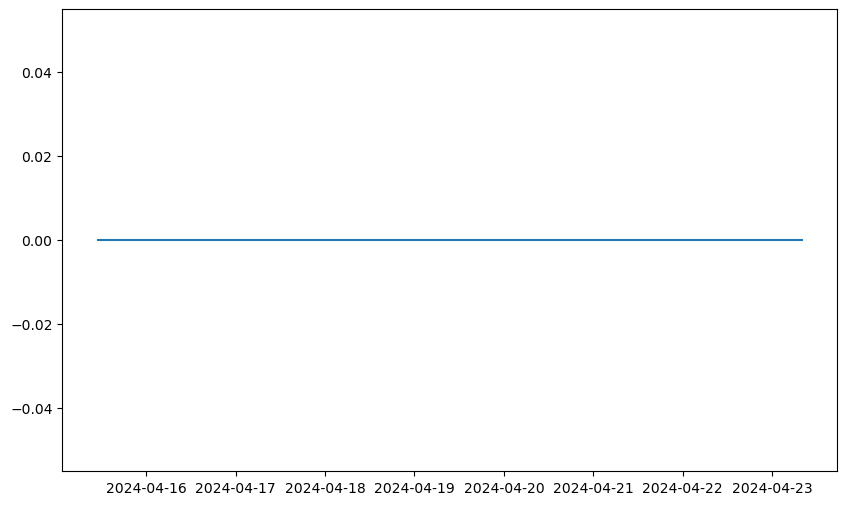

CPU times: user 10.4 s, sys: 431 ms, total: 10.8 s
Wall time: 15.3 s


In [23]:
%%time

feature_id = np.random.choice(ds_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_CONUS_Medium_Range**, random feature_id:

start_t: 2024-04-15 10:48:56.586929, end_t: 2024-04-29 10:48:56.587006, feature_id: 14555491


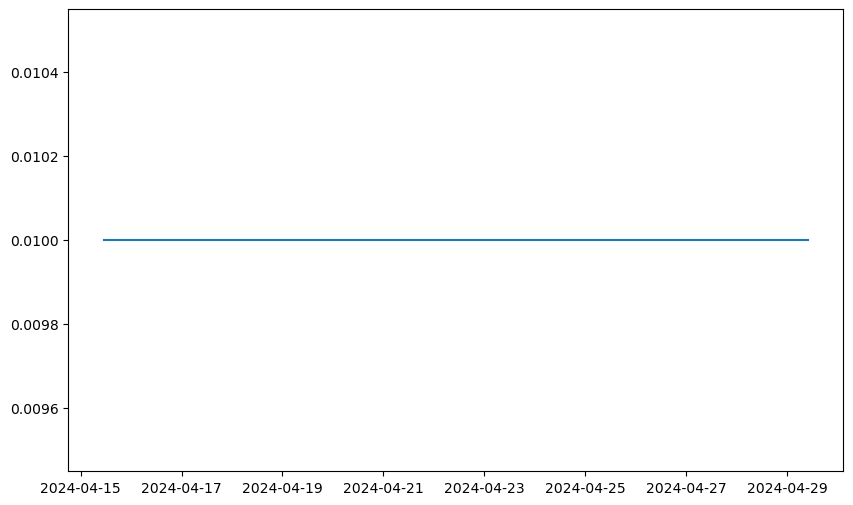

CPU times: user 18.2 s, sys: 1.02 s, total: 19.2 s
Wall time: 25.5 s


In [24]:
%%time

feature_id = np.random.choice(ds_mr.isel(time=0).coords['feature_id'])
ts_ds = ds_mr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_PuertoRico_Short_Range**, random feature_id:

start_t: 2024-04-15 10:48:56.586929, end_t: 2024-04-29 10:48:56.587006, feature_id: 800036432


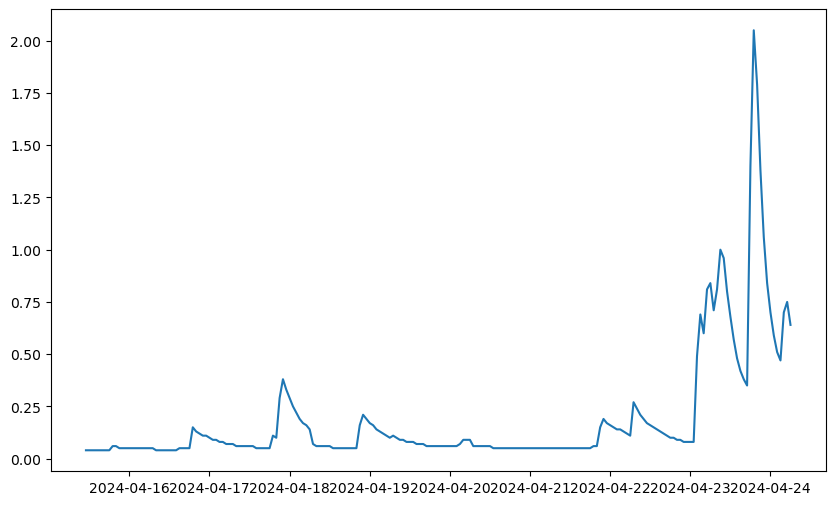

CPU times: user 888 ms, sys: 34.5 ms, total: 922 ms
Wall time: 10 s


In [25]:
%%time

feature_id = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_pr_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

start_t: 2024-04-15 10:48:56.586929, end_t: 2024-04-29 10:48:56.587006, feature_id: 800039334


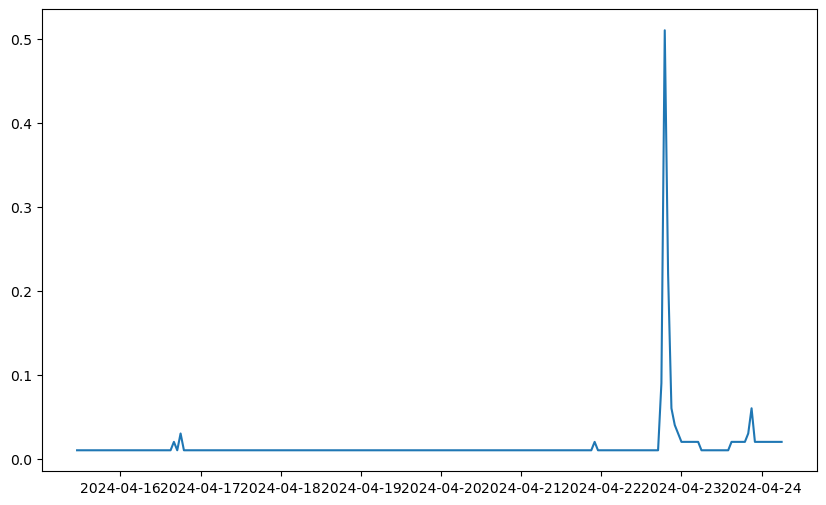

CPU times: user 892 ms, sys: 48.2 ms, total: 940 ms
Wall time: 9 s


In [26]:
%%time

feature_id = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_pr_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_Hawaii_Short_Range**, random feature_id:

start_t: 2024-04-15 10:48:56.586929, end_t: 2024-04-29 10:48:56.587006, feature_id: 800013431


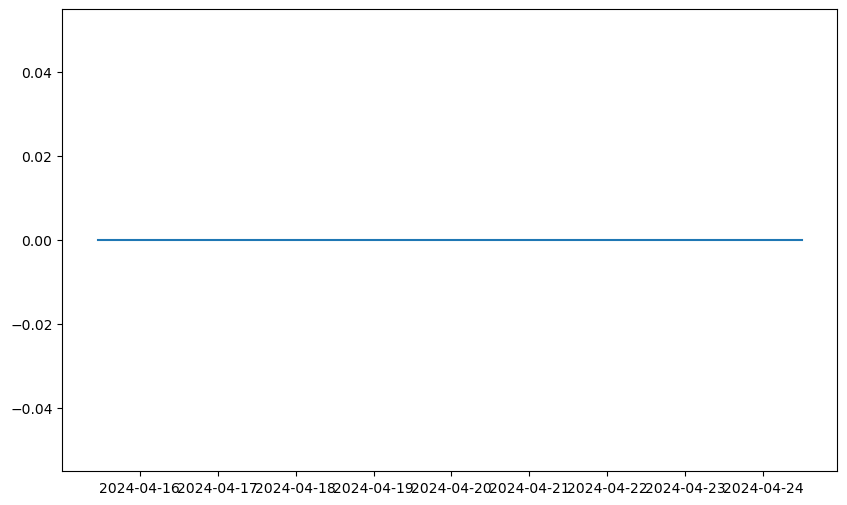

CPU times: user 3.12 s, sys: 233 ms, total: 3.35 s
Wall time: 40.5 s


In [27]:
%%time

feature_id = np.random.choice(ds_hi_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_hi_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_Alaska_Short_Range**, random feature_id:

start_t: 2024-04-15 10:48:56.586929, end_t: 2024-04-29 10:48:56.587006, feature_id: 75000600021735


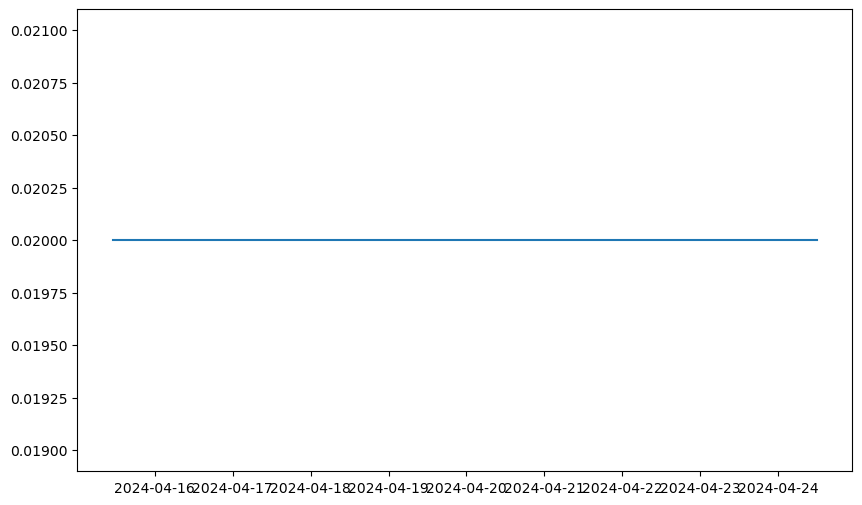

CPU times: user 2.22 s, sys: 163 ms, total: 2.39 s
Wall time: 10.6 s


In [32]:
%%time

feature_id = np.random.choice(ds_ak_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_ak_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_Alaska_Medium_Range**, random feature_id:

start_t: 2024-04-15 10:48:56.586929, end_t: 2024-04-29 10:48:56.587006, feature_id: 19020190083208


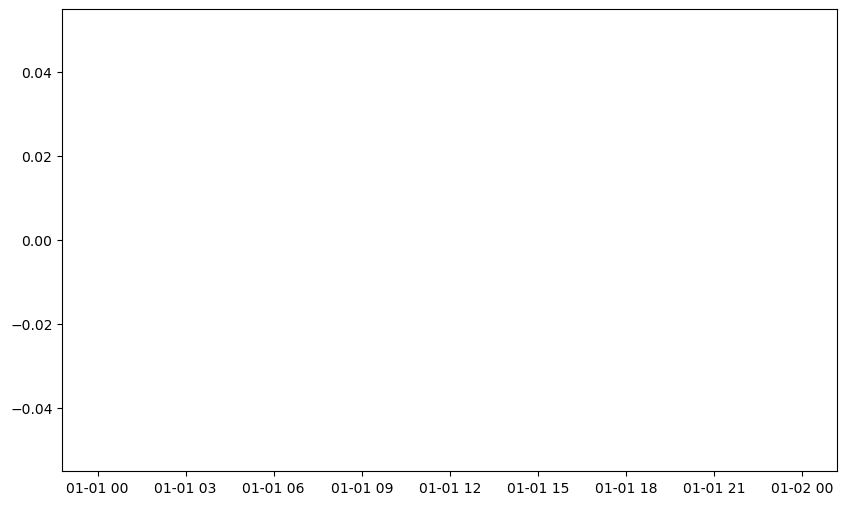

CPU times: user 3.13 s, sys: 230 ms, total: 3.36 s
Wall time: 10.8 s


In [33]:
%%time

feature_id = np.random.choice(ds_ak_mr.isel(time=0).coords['feature_id'])
ts_ds = ds_ak_mr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

### Original Plot

This is the equivalent of the plot code in the original notebook, with a different two week time window to match the above plots

&nbsp;

**Extract and plot the timeseries data**

start_t: 2024-04-15 10:48:56.586929, end_t: 2024-04-29 10:48:56.587006, feature_id: 19020190088835


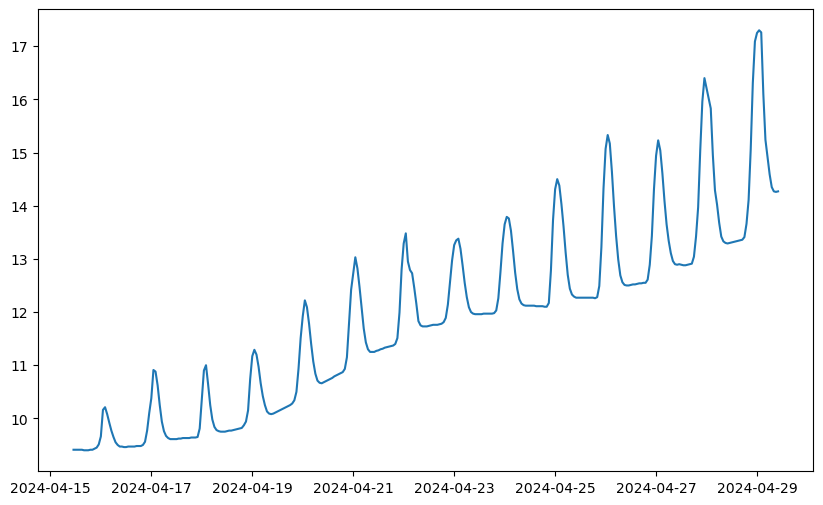

In [31]:
# use the pre-selected feature_id instead:

# this will select the first feature_id value at time slice 0:
#feature_id = ds_ak_mr.isel(time=0).coords['feature_id'].values[0]

# this will select the feature_id value at index -100 at time slice 0:
feature_id = ds_ak_mr.isel(time=0).coords['feature_id'].values[-100]

# this will use the hardcoded feature_id from the original notebook (sometimes errors out if not present):
feature_id = ds_ak_mr.sel(feature_id=19020190088835).coords['feature_id'].values

#print output:
print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")


ts_ds = ds_ak_mr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

plt.show()

### Testing 

Just some testing of xarray subset functions for the above slicing/subsetting/plotting tests:

In [17]:
# testing xarray functions............

#feature_id = 19020190088835
#start_t='2024-02-23T13:00'
#end_t = '2024-03-16T02:00'



# slice by first feature_id element:

# these functions slice by the first feature_id value, returning an xarray dataset with all times at the single feature_id index value
#feature_id = ds_mr.isel(feature_id=0)
#feature_id = ds_mr.isel(feature_id=0).coords['feature_id']

# to get the actual value of the feature_id coordinate here, we don't use array syntax, as it's a scalar:
feature_id = ds_mr.isel(feature_id=0).coords['feature_id'].values


# slice by first element of the time dimension:

# returns full xarray dataset:
#feature_id = ds_mr.isel(time=0)

# returns the feature_id coordinate xarray datarray:
#feature_id = ds_mr.isel(time=0).coords['feature_id']
feature_id = ds_mr.isel(time=0).coords['feature_id'].values

# returns the 0th feature_id coordinate value:
#feature_id = ds_mr.isel(time=0).coords['feature_id'].values[0]



# or, just select a feature_id (doesn't actually do anything just output the same value):

#feature_id = ds_sr.sel(feature_id=19020190088835)
#feature_id = ds_ak_mr.sel(feature_id=19020190088835).coords['feature_id'].values




# np random sample of 1000 feature_ids:
#feature_id_sr = np.random.choice(ds_sr.isel(time=0).coords['feature_id'], size=100)
feature_id = np.random.choice(ds_sr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_mr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_ak_sr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_ak_mr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_hi_sr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'], size=100)

#print(feature_id_sr)
#print(feature_id)